In [107]:
%cd /content/drive/MyDrive/21-1/Computational Physics/data/myModules/myModules

/content/drive/MyDrive/21-1/Computational Physics/data/myModules/myModules


In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
#1
df1_x=[-1,1,3]
df1_y=[17,-7,-15]

1. 가

In [21]:
l0 = lambda x: ((x-df1_x[1])*(x-df1_x[2]))/((df1_x[0]-df1_x[1])*(df1_x[0]-df1_x[2])) 
l1 = lambda x: ((x-df1_x[0])*(x-df1_x[2]))/((df1_x[1]-df1_x[0])*(df1_x[1]-df1_x[2])) 
l2 = lambda x: ((x-df1_x[0])*(x-df1_x[1]))/((df1_x[2]-df1_x[0])*(df1_x[2]-df1_x[1])) 

In [26]:
x=np.arange(-1,3.1,0.01)
l0_y=l0(x)
l1_y=l1(x)
l2_y=l2(x)
p2= lambda x: df1_y[0]*l0(x)+df1_y[1]*l1(x)+df1_y[2]*l2(x)
p2_y=p2(x)

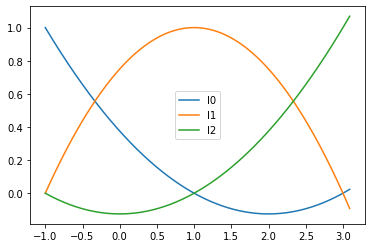

In [31]:
plt.plot(x,l0_y,label='l0')
plt.plot(x,l1_y,label='l1')
plt.plot(x,l2_y,label='l2')
plt.legend()

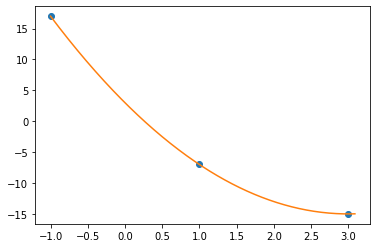

In [32]:
plt.plot(df1_x,df1_y,'o')
plt.plot(x,p2_y) #2degree

1 나)

In [93]:
def coeffts(x,y):
  m=len(y)
  y=np.array(y)
  x=np.array(x)
  a=y.copy()
  for k in range(1,m): #a[0]==y[0]이므로 a[1]부터
    a[k:m]=(a[k:m]-a[k-1])/(x[k:m]-x[k-1])
  return a

def evalpoly(a,xdata,x):
  n=len(xdata)-1 #n-1 degree
  p=a[n]
  
  for k in range(1,n+1):
    p=a[n-k]+(x-xdata[n-k])*p
  return p


In [79]:
a=coeffts(df1_x,df1_y)
x=np.arange(-1,3.1,0.01)
poly_y=evalpoly(a,df1_x,x)

In [82]:
a #a 계수

array([ 17, -12,   2])

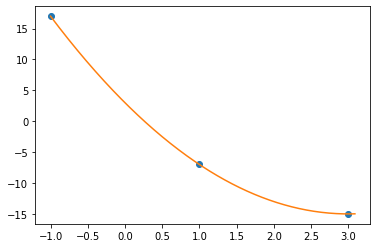

In [80]:
plt.plot(df1_x,df1_y,'o')
plt.plot(x,poly_y) #2degree

2

In [111]:
df2_x=np.array([0,1,2])
df2_y=np.array([0,2,1])

2 가)

In [108]:
from LUdecomp3 import *

In [109]:
def curvatures(xData,yData):
    n = len(xData) - 1
    c = np.zeros(n)
    d = np.ones(n+1)
    e = np.zeros(n)
    k = np.zeros(n+1)
    c[0:n-1] = xData[0:n-1] - xData[1:n]
    d[1:n] = 2.0*(xData[0:n-1] - xData[2:n+1])
    e[1:n] = xData[1:n] - xData[2:n+1]
    k[1:n] =6.0*(yData[0:n-1] - yData[1:n])/(xData[0:n-1] - xData[1:n]) \
            - 6.0*(yData[1:n] - yData[2:n+1])/(xData[1:n] - xData[2:n+1])
    LUdecomp3(c,d,e)
    LUsolve3(c,d,e,k)
    
    return k

def evalSpline(xData,yData,k,x):
    def findSegment(xData,x):
        iLeft = 0
        iRight = len(xData)- 1
        while 1:
            if (iRight-iLeft) <= 1: return iLeft
            i =int((iLeft + iRight)/2)
            if x < xData[i]: iRight = i
            else: iLeft = i
    i = findSegment(xData,x)
    h = xData[i] - xData[i+1]
    y = ((x - xData[i+1])**3/h - (x - xData[i+1])*h)*k[i]/6.0 \
            - ((x - xData[i])**3/h - (x - xData[i])*h)*k[i+1]/6.0   \
            + (yData[i]*(x - xData[i+1])                            \
            - yData[i+1]*(x - xData[i]))/h
            
    return y

In [124]:
k=np.zeros(3)
k[1]=6*(df2_y[0]-2*df2_y[1]+df2_y[2])/4
print(k)

[ 0.  -4.5  0. ]


In [117]:
x=np.arange(0,2.1,0.1)
spline_y=[evalSpline(df2_x,df2_y,k,i) for i in x]

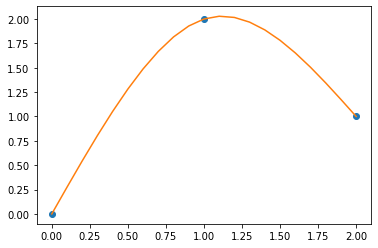

In [120]:
plt.plot(df2_x,df2_y,'o')
plt.plot(x,spline_y)

2.나)

In [126]:
k=np.zeros(3)
k[0]=1
k[2]=-1
k[1]=6*(df2_y[0]-2*df2_y[1]+df2_y[2])/4
print(k)

[ 1.  -4.5 -1. ]


In [127]:
x=np.arange(0,2.1,0.1)
spline_y2=[evalSpline(df2_x,df2_y,k,i) for i in x]

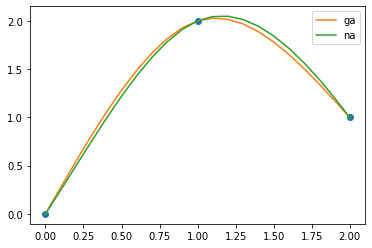

In [131]:
plt.plot(df2_x,df2_y,'o')
plt.plot(x,spline_y,label='ga') #가
plt.plot(x,spline_y2,label='na') #나
plt.legend()

3

In [91]:
x=np.array([-250,-200,-100,0,100,300])
y=np.array([0.0163,0.318,0.699,0.870,0.941,1.04])

In [98]:
def rational(xData, yData, x):
    m = len(xData)
    r = yData.copy()
    rOld = np.zeros(m)
    for k in range(m-1):
        for i in range(m-k-1):
            if abs(x - xData[i+k+1]) < 1.0e-9:
                return yData[i+k+1]
            else:
                c1 = r[i+1] - r[i]
                c2 = r[i+1] - rOld[i+1]
                c3 = (x - xData[i])/(x - xData[i+k+1])
                r[i] = r[i+1] + c1/(c3*(1.0 - c1/c2) - 1.0)
                rOld[i+1] = r[i+1]

    return r[0]

In [104]:
rational_y=[rational(x,y,i) for i in new_x]

In [99]:
a=coeffts(x,y)
new_x=np.arange(-250,500,5)
newtonpoly_y=evalpoly(a,x,new_x)

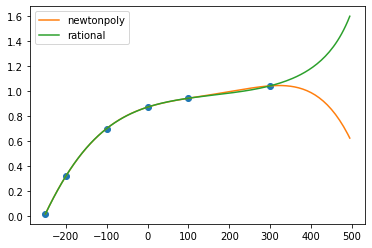

In [106]:
plt.plot(x,y,'o')
plt.plot(new_x,newtonpoly_y,label='newtonpoly')
plt.plot(new_x,rational_y,label='rational')
plt.legend()

데이터가 존재하였던 -200~300구간에서는 두 함수가 유사하다.  
하지만 기존 데이터가 없던 300이상 구간에서는 큰차이가 있었다.  
t가 증가할때 비열이 계속 증가했던 것으로 보아 rational 방식이  
 300이상 구간에서 좀더 합리적이라 생각된다.